<a href="https://colab.research.google.com/github/zeepdolgin/Projects-in-Programming/blob/main/Code_analysis_webiste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the SQLAlchemy library if it is not installed

!sudo apt-get install python3-mysqldb
!sudo pip3 install -U sqlalchemy sql_magic


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  default-mysql-server | virtual-mysql-server python-egenix-mxdatetime
  python3-mysqldb-dbg
The following NEW packages will be installed:
  python3-mysqldb
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 46.0 kB of archives.
After this operation, 183 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-mysqldb amd64 1.3.10-1build1 [46.0 kB]
Fetched 46.0 kB in 1s (49.5 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: u

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 5.9MB/s 
     |████████████████████████████████| 14.8MB 309kB/s 
     |████████████████████████████████| 6.5MB 35.8MB/s 


In [ ]:
from sqlalchemy import create_engine


In [ ]:
# conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset=utf8'.format(
#     user='student',
#     password='dwdstudent2015',
#     host = 'db.ipeirotis.org',
#     port=3306,
#     db='Team_D',
#     encoding = 'utf-8'
# )
# engine = create_engine(conn_string)

conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='student',
    password='dwdstudent2015',
    host = 'db.ipeirotis.org',
    port=3306,
    db='public',
    encoding = 'utf8'
)
engine = create_engine(conn_string)


db_name = 'public'

In [ ]:
q = 'SHOW columns FROM Team_D';

r = engine.execute(q)
for i in r:
  print(i)

('MyUnknownColumn', 'int(11)', 'YES', '', None, '')
('postal_code', 'bigint(20)', 'YES', '', None, '')
('listing_id', 'bigint(20)', 'YES', '', None, '')
('address', 'text', 'YES', '', None, '')
('neighborhood', 'text', 'YES', '', None, '')
('latitude', 'double', 'YES', '', None, '')
('longitude', 'double', 'YES', '', None, '')
('bed', 'int(11)', 'YES', '', None, '')
('bath', 'int(11)', 'YES', '', None, '')
('size', 'int(11)', 'YES', '', None, '')
('broker_name', 'text', 'YES', '', None, '')
('property_type', 'text', 'YES', '', None, '')
('property_sub_type', 'text', 'YES', '', None, '')
('price', 'int(11)', 'YES', '', None, '')


In [ ]:
# Important Misc Notes
# - have to change two word column names to a _ to be able to access via SQL
# - Error catch for no filter currently returns a string "Please input at least one filter"
# - Need to implement exception handling for incorrect user inputs (non integers, etc)

#Filter Function
def filter(neighborhood, bed, bath, size):

  if size != 'null':
    upper = int(size) + 100
    lower = int(size) - 100

  if ('null' not in {neighborhood, bed, bath, size}):
    # neighborhood is null
    if ('null' not in {bed, bath, size}):
      query = f"SELECT * FROM Team_D WHERE bed LIKE {bed} AND bath LIKE {bath} AND size > {lower} AND size < {upper};"
      dfend = pd.read_sql(query, con = engine)
      return dfend
    else:
      if ('null' not in {bath, size}):
        query = f"SELECT * FROM Team_D WHERE bath LIKE {bath} AND size > {lower} AND size < {upper};"
        dfend = pd.read_sql(query, con = engine)
        return dfend
      else:
        if ('null' not in {bed, size}):
          query = f"SELECT * FROM Team_D WHERE bed LIKE {bed} AND size > {lower} AND size < {upper};"
          dfend = pd.read_sql(query, con = engine)
          return dfend
        else:
          if ('null' not in {bed, bath}):
            query = f"SELECT * FROM Team_D WHERE bed LIKE {bed} AND bath LIKE {bath};"
            dfend = pd.read_sql(query, con = engine)
            return dfend
          else:
            if ('null' not in size):
              query = f"SELECT * FROM Team_D WHERE size > {lower} AND size < {upper};"
              dfend = pd.read_sql(query, con = engine)
              return dfend
            else:
              if ('null' not in bed):
                query = f"SELECT * FROM Team_D WHERE bed LIKE {bed};"
                dfend = pd.read_sql(query, con = engine)
                return dfend
              else:
                if ('null' not in bath):
                 query = f"SELECT * FROM Team_D WHERE bath LIKE {bath};"
                 dfend = pd.read_sql(query, con = engine)
                 return dfend
                else:
                 return "Please select at least one filter"
    # bed is null
    if ('null' not in {neighborhood, bath, size}):
      query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bath LIKE {bath} AND size > {lower} AND size < {upper};"
      dfend = pd.read_sql(query, con = engine)
      return dfend
    else:
      if ('null' not in {bath, size}):
        query = f"SELECT * FROM Team_D WHERE bath LIKE {bath} AND size > {lower} AND size < {upper};"
        dfend = pd.read_sql(query, con = engine)
        return dfend
      else:
        if ('null' not in {neighborhood, size}):
          query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND size > {lower} AND size < {upper};"
          dfend = pd.read_sql(query, con = engine)
          return dfend
        else:
          if ('null' not in {neighborhood, bath}):
            query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bath LIKE {bath};"
            dfend = pd.read_sql(query, con = engine)
            return dfend
          else:
            if ('null' not in size):
              query = f"SELECT * FROM Team_D WHERE size > {lower} AND size < {upper};"
              dfend = pd.read_sql(query, con = engine)
              return dfend
            else:
              if ('null' not in neighborhood):
                query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}';"
                dfend = pd.read_sql(query, con = engine)
                return dfend
              else:
                if ('null' not in bath):
                 query = f"SELECT * FROM Team_D WHERE bath LIKE {bath};"
                 dfend = pd.read_sql(query, con = engine)
                 return dfend
                else:
                 return "Please select at least one filter"
    # bath is null
    if ('null' not in {neighborhood, bed, size}):
      query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bed LIKE {bed} AND size > {lower} AND size < {upper};"
      dfend = pd.read_sql(query, con = engine)
      return dfend
    else:
      if ('null' not in {bed, size}):
        query = f"SELECT * FROM Team_D WHERE bed LIKE {bed} AND size > {lower} AND size < {upper};"
        dfend = pd.read_sql(query, con = engine)
        return dfend
      else:
        if ('null' not in {neighborhood, size}):
          query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND size > {lower} AND size < {upper};"
          dfend = pd.read_sql(query, con = engine)
          return dfend
        else:
          if ('null' not in {neighborhood, bed}):
            query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bed LIKE {bed};"
            dfend = pd.read_sql(query, con = engine)
            return dfend
          else:
            if ('null' not in size):
              query = f"SELECT * FROM Team_D WHERE size > {lower} AND size < {upper};"
              dfend = pd.read_sql(query, con = engine)
              return dfend
            else:
              if ('null' not in neighborhood):
                query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}';"
                dfend = pd.read_sql(query, con = engine)
                return dfend
              else:
                if ('null' not in bed):
                 query = f"SELECT * FROM Team_D WHERE bed LIKE {bed};"
                 dfend = pd.read_sql(query, con = engine)
                 return dfend
                else:
                 return "Please select at least one filter"
    # size is null
    if ('null' not in {neighborhood, bed, bath}):
      query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bed LIKE {bed} AND bath LIKE {bath};"
      dfend = pd.read_sql(query, con = engine)
      return dfend
    else:
      if ('null' not in {bed, bath}):
        query = f"SELECT * FROM Team_D WHERE bed LIKE {bed} AND bath LIKE {bath};"
        dfend = pd.read_sql(query, con = engine)
        return dfend
      else:
        if ('null' not in {neighborhood, bath}):
          query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bath LIKE {bath};"
          dfend = pd.read_sql(query, con = engine)
          return dfend
        else:
          if ('null' not in {neighborhood, bed}):
            query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bed LIKE {bed};"
            dfend = pd.read_sql(query, con = engine)
            return dfend
          else:
            if ('null' not in bath):
              query = f"SELECT * FROM Team_D WHERE bath LIKE {bath};"
              dfend = pd.read_sql(query, con = engine)
              return dfend
            else:
              if ('null' not in neighborhood):
                query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}';"
                dfend = pd.read_sql(query, con = engine)
                return dfend
              else:
                if('null' not in bed):
                 query = f"SELECT * FROM Team_D WHERE bed LIKE {bed};"
                 dfend = pd.read_sql(query, con = engine)
                 return dfend
                else:
                 return "Please select at least one filter"
  else:
    # All filters
    query = f"SELECT * FROM Team_D WHERE neighborhood LIKE '{neighborhood}' AND bed LIKE {bed} AND bath LIKE {bath} AND size > {lower} AND size < {upper};"
    dfend = pd.read_sql(query, con = engine)
    return dfend


#print(filter('Chelsea','null',1,750))

In [ ]:
nneighborhood_filter = input("Enter neighborhood here, if you do not want to filter by this variable enter 'null': ")
bed_filter = input("Enter number of bedrooms, if you do not want to filter by this variable enter 'null': ")
bath_filter = input("Enter number of bathrooms, if you do not want to filter by this variable enter 'null': ")
size_filter = input("Enter approximate size in square feet, if you do not want to filter by this variable enter 'null': ")

df = filter(neighborhood_filter, bed_filter, bath_filter, size_filter)
print(df)

Enter neighborhood here, if you do not want to filter by this variable enter 'null': Chelsea
Enter number of bedrooms, if you do not want to filter by this variable enter 'null': null
Enter number of bathrooms, if you do not want to filter by this variable enter 'null': null
Enter approximate size in square feet, if you do not want to filter by this variable enter 'null': null
Please select at least one filter


In [ ]:
type(size_filter)

str

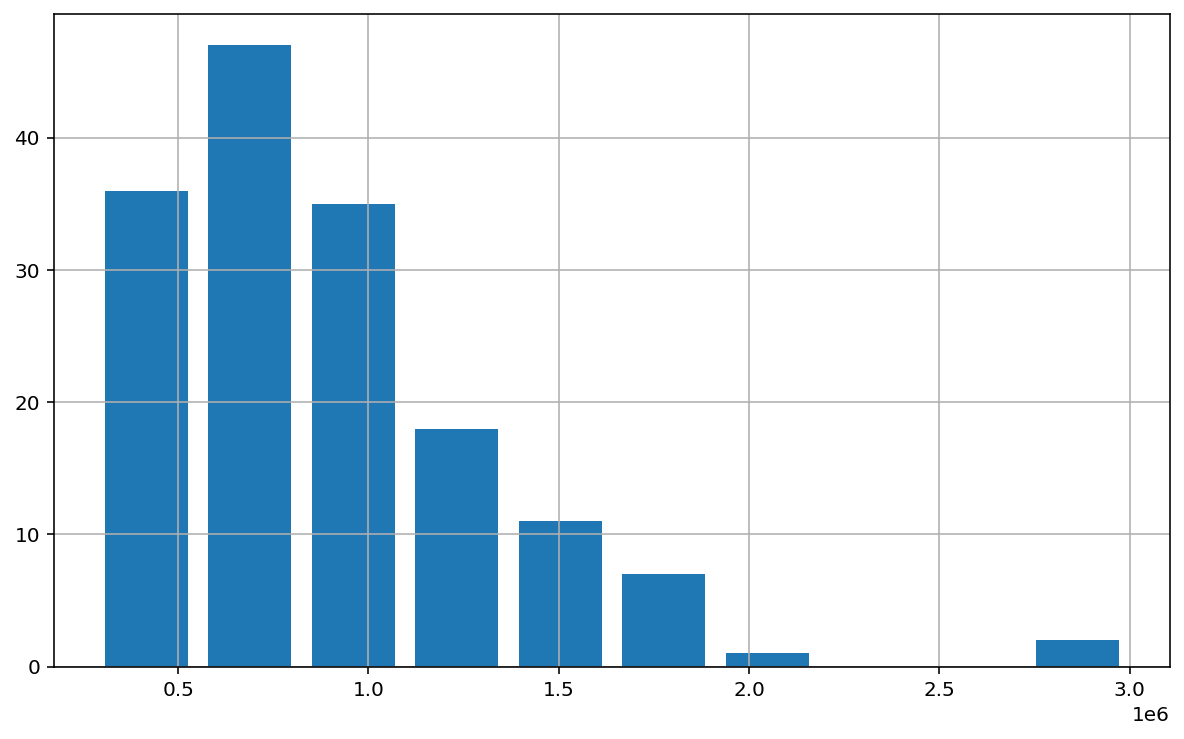

In [ ]:
plot = df.iloc[:,13].hist(
  figsize=(10, 6),
  rwidth = 0.8,
  grid=True,
  legend=False
  )

# postal code iloc[:,1]
# size iloc[:,9]
# price  iloc[:,13]


In [ ]:

ok = df.iloc[:,9]

cnt = Counter()
for x in ok:
  cnt[x.lower()] += 1

newdict = cnt.most_common(15)

list_names = []
list_amount = []

for x in newdict:
  list_names.append(x[0])
  list_amount.append(x[1])

#print(list_names)
#print(list_amount)

type(list_amount[0])


int

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


([<matplotlib.patches.Wedge object at 0x7fdccc54e5c0>, <matplotlib.patches.Wedge object at 0x7fdccc528588>, <matplotlib.patches.Wedge object at 0x7fdccc5285c0>, <matplotlib.patches.Wedge object at 0x7fdccc51bf28>, <matplotlib.patches.Wedge object at 0x7fdccc51b160>, <matplotlib.patches.Wedge object at 0x7fdccc573160>, <matplotlib.patches.Wedge object at 0x7fdccc573898>, <matplotlib.patches.Wedge object at 0x7fdccc573e80>, <matplotlib.patches.Wedge object at 0x7fdccc570f98>, <matplotlib.patches.Wedge object at 0x7fdccc5704e0>, <matplotlib.patches.Wedge object at 0x7fdccc55b2b0>, <matplotlib.patches.Wedge object at 0x7fdccc510e48>, <matplotlib.patches.Wedge object at 0x7fdccc5105f8>, <matplotlib.patches.Wedge object at 0x7fdccc5227b8>, <matplotlib.patches.Wedge object at 0x7fdcccb00080>], [Text(0.5722633588828934, 0.9394225077567969, 'compass'), Text(-0.9291766471569779, 0.5887535633676599, 'douglas elliman - 575 madison ave'), Text(-1.0938380255762563, -0.11626854176189402, "sotheby's i

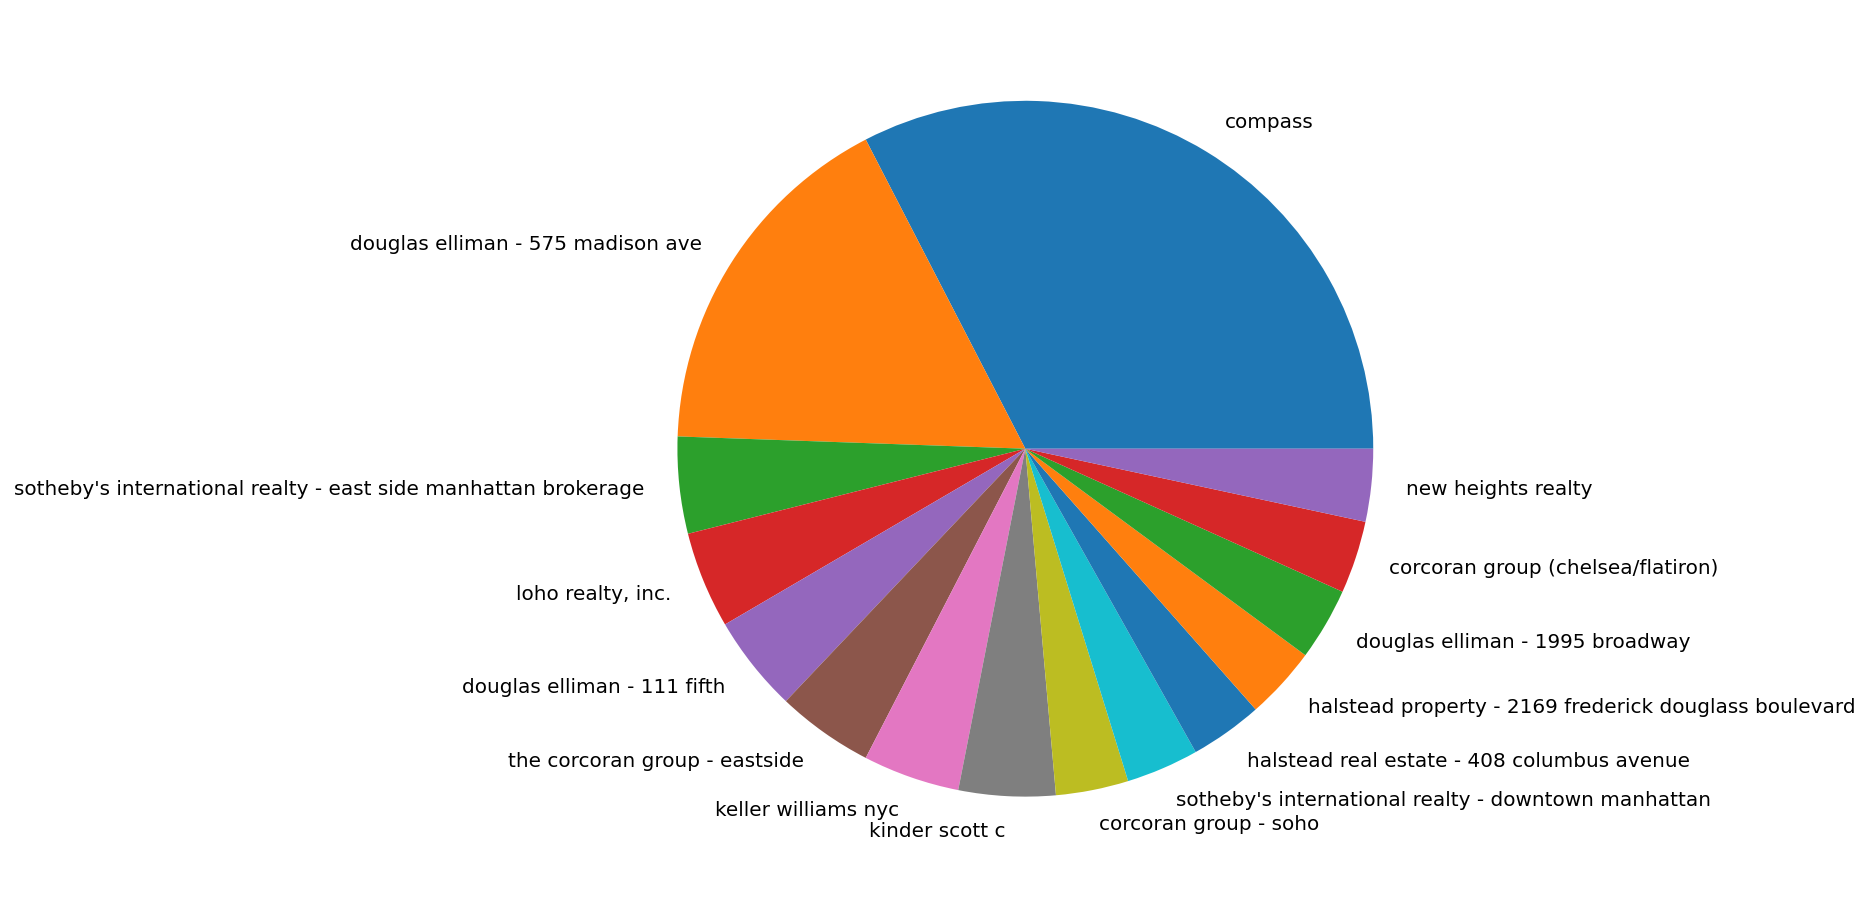

In [ ]:
plt.figure('Pie Chart Example', figsize=(8,8), facecolor='white')

plot = plt.pie(list_amount,labels=list_names)
print(plot)


In [ ]:
def create_pie_charts(df):

  ok = df.iloc[:,9]
  cnt = Counter()
  for x in ok:
    cnt[x.lower()] += 1
  newcnt = cnt.most_common(15)

  list_names = []
  list_amount = []

  for x in newcnt:
    list_names.append(x[0])
    list_amount.append(x[1])

  plt.figure('Pie Chart for Brokers', figsize=(10,10), facecolor='white')
  plot = plt.pie(list_amount,labels=list_names)

  # Store the file under the static folder, and give a name plot-<stationid>.png
  filename = 'static/piechart.png'
  fig = plot.get_figure()
  fig.savefig('/content/drive/My Drive/'+filename, dpi=72, pad_inches=1)
  fig.clear()





  # Return back the name of the image file
  return filename

AttributeError: ignored

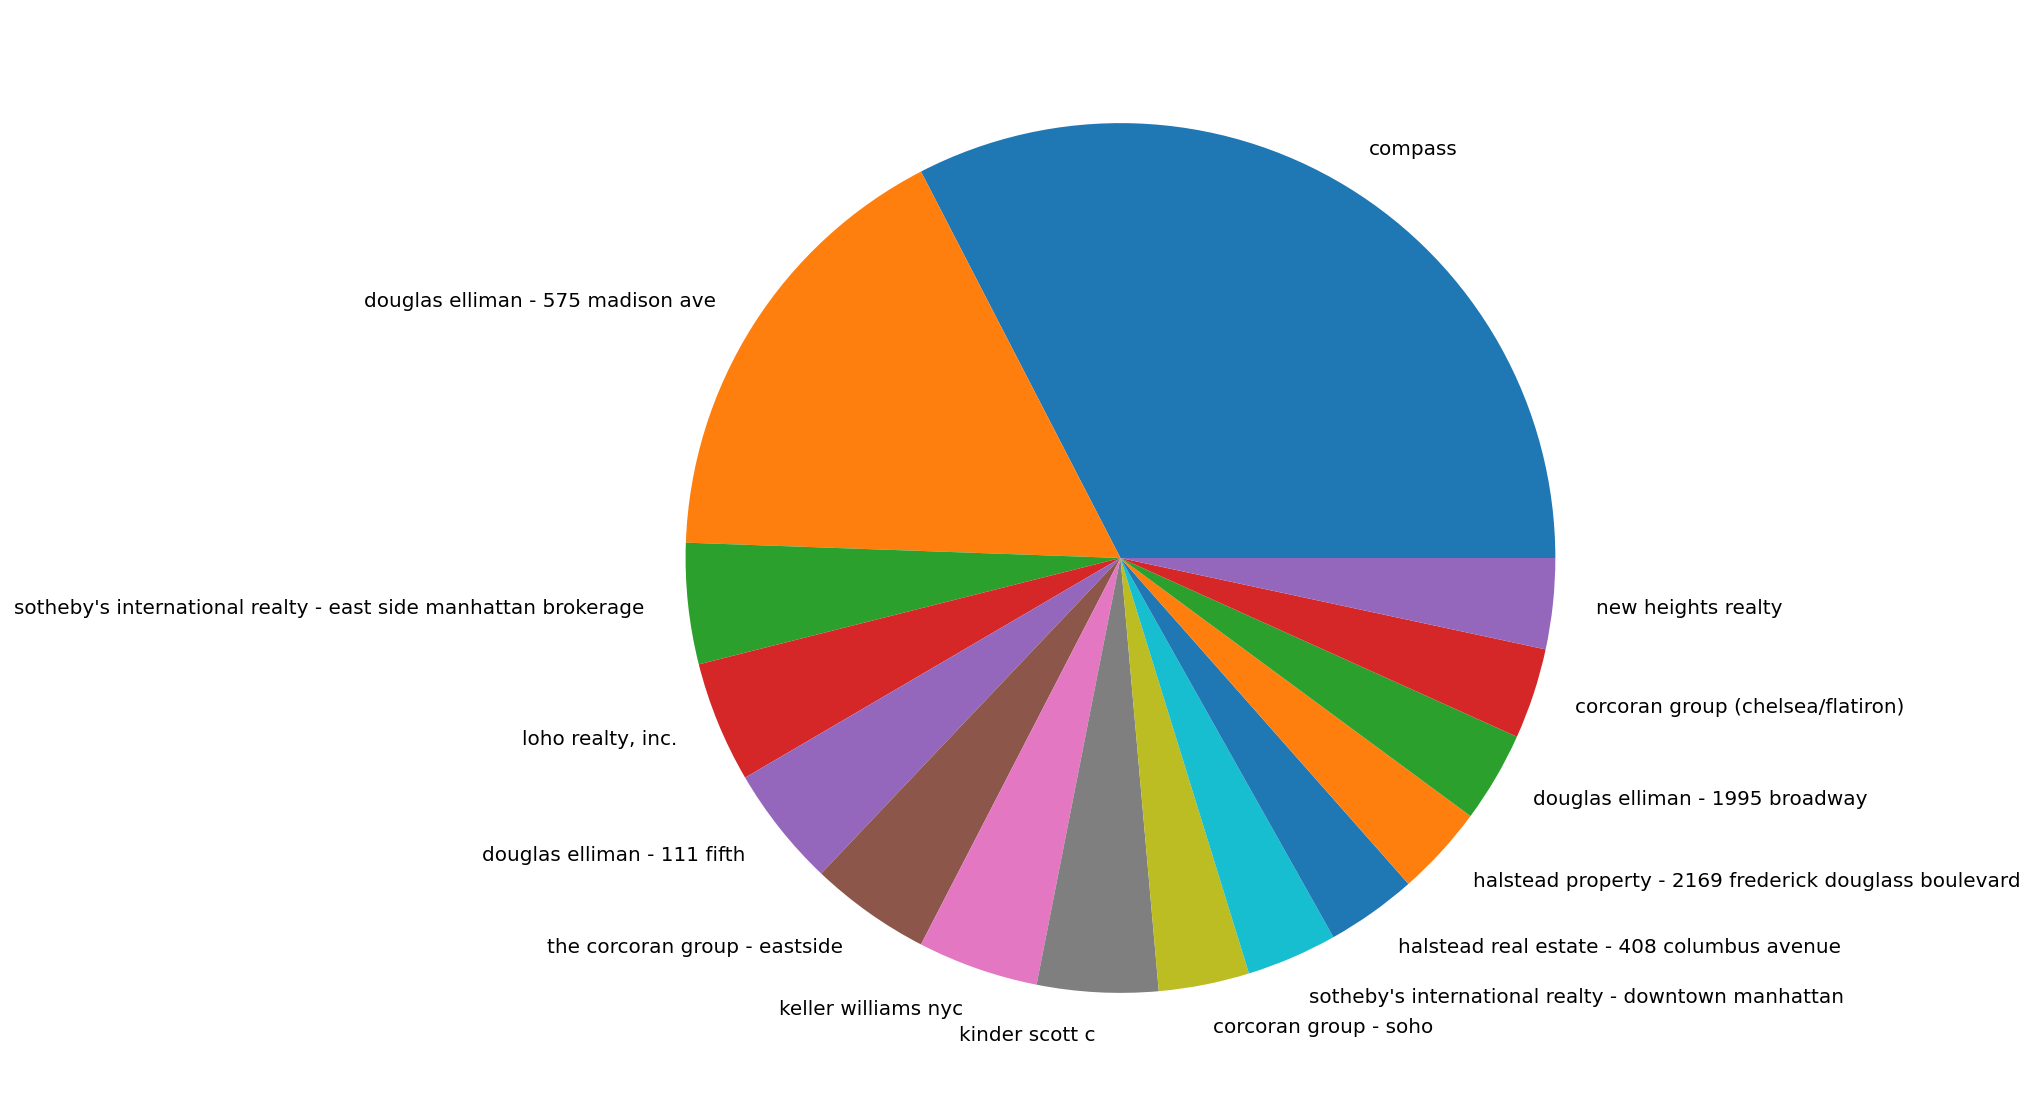

In [ ]:
image_filename = create_pie_charts(df)

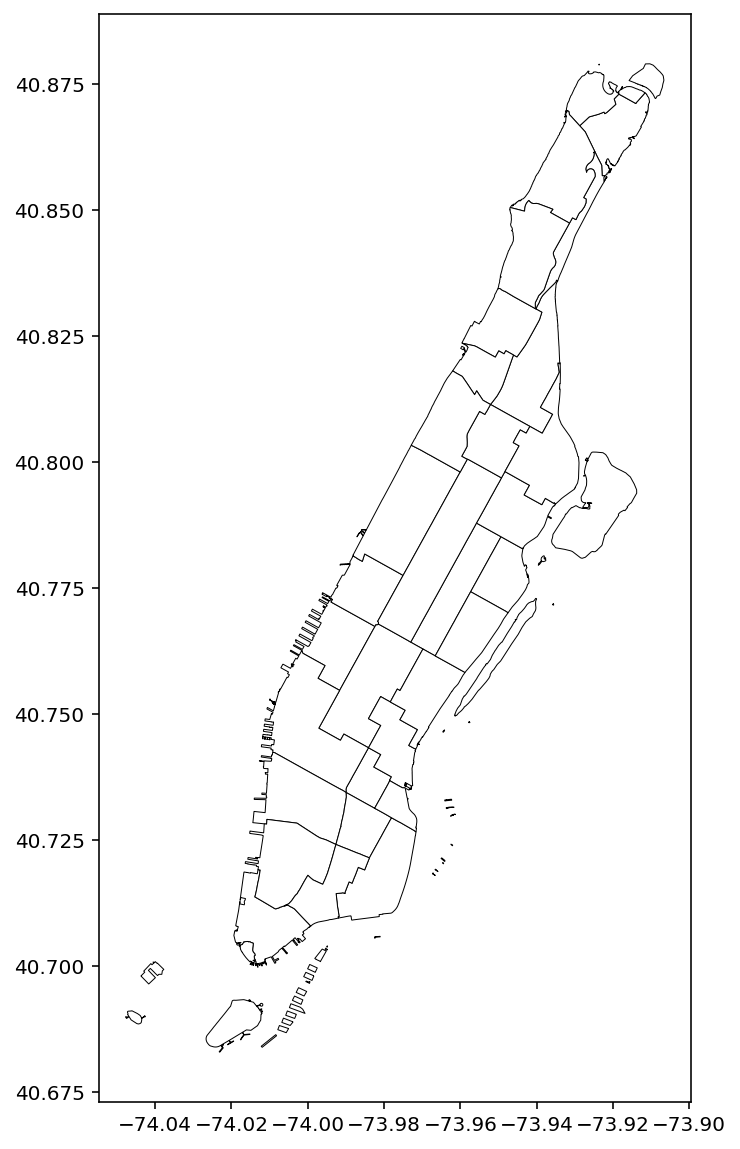

In [ ]:
# Manhattan Graph

# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
shapefile = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
# Load the shapefile
df_nyc = gpd.GeoDataFrame.from_file(shapefile)
# Limit the data to only Manhattan neighborhoods
df_manhattan = df_nyc.query( "boro_name =='Manhattan' ")
# Create a plot
manhattan_plot = df_manhattan.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

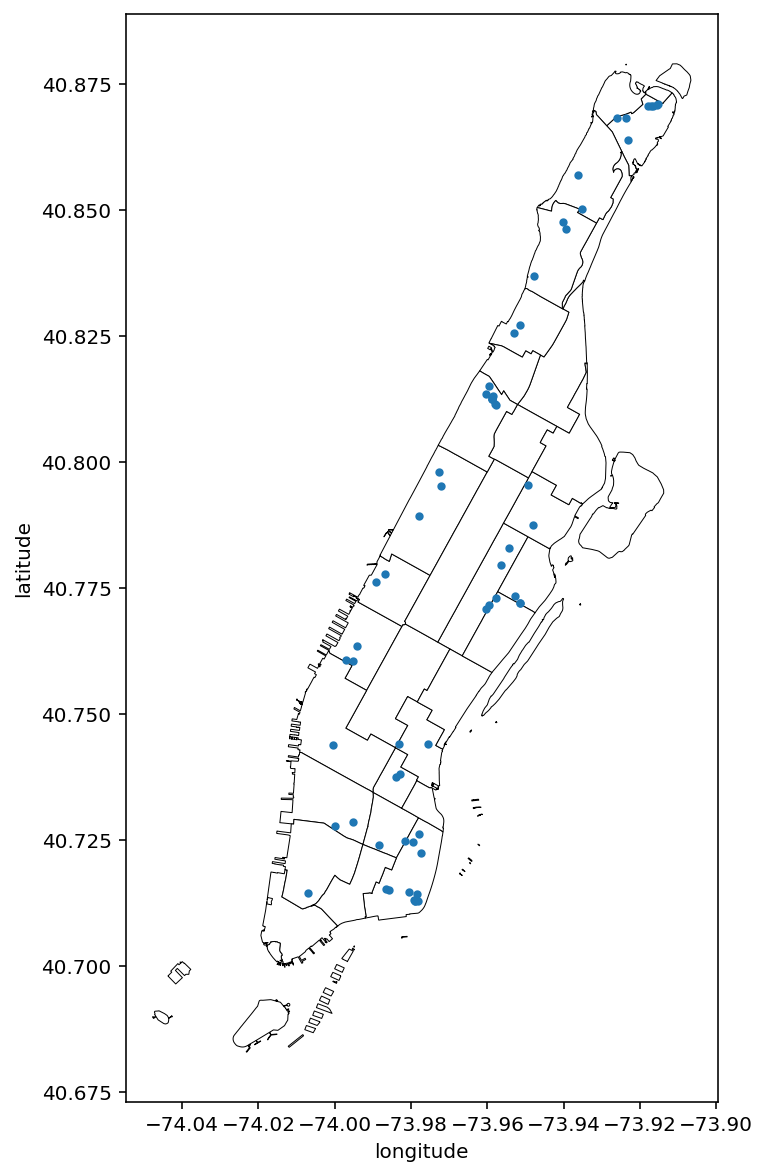

In [ ]:
df_man = df[['latitude', 'longitude']]

manhattan_plot = df_manhattan.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

scatterplot = df_man.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(15, 10),
    s=10,
    alpha=1,
    ax = manhattan_plot)

In [ ]:
df = pd.read_sql("SELECT * FROM Team_D WHERE neighborhood LIKE 'Chelsea';", con = engine)
print(df)

     MyUnknownColumn  postal code  ...    price   latitude
0                  3        10001  ...  4250000  40.753582
1                  7        10001  ...  2795000  40.748340
2                 11        10001  ...  4400000  40.748684
3                 13        10001  ...  3500000  40.746848
4                 15        10001  ...  4950000  40.754718
..               ...          ...  ...      ...        ...
178             1572        10011  ...  2699999  40.743489
179             1578        10011  ...  1650000  40.743922
180             1580        10011  ...   675000  40.742449
181             2014        10014  ...  1949000  40.740869
182             2046        10014  ...  3250000  40.740880

[183 rows x 14 columns]


In [ ]:
!pip install flask==0.12.2
!pip install flask-ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from flask import Flask, render_template, url_for, redirect
from flask_ngrok import run_with_ngrok
from sqlalchemy import create_engine
from flask import request
import requests
import math
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )



app = Flask(__name__, template_folder = '/content/drive/My Drive/templates')
run_with_ngrok(app)


#first page of the website where you choose what youd like to do
@app.route('/')
def home():
  return render_template('website3.html')

#this allows to redirect you depending on what option in the home page you chose
@app.route('/redirect')
def options():
  option = request.args.get("options")
  if option == "option1":
    return redirect(url_for("option1"))
  elif option == "option2":
    return redirect(url_for("option2"))


#first option template
@app.route('/option1')
def option1():
  return render_template('option1.html')


#second option template
@app.route('/option2')
def option2():
  return render_template('option2.html')

#graphs stuff not done yet
@app.route('/result1')
def result1():

  conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}?charset={encoding}'.format(
    user='student',
    password='dwdstudent2015',
    host = 'db.ipeirotis.org',
    port=3306,
    db='public',
    encoding = 'utf8')
  engine = create_engine(conn_string)
  db_name = 'public'

"""

    query = '''SELECT DISTINCT id AS station_id, name, capacity, lat, lon
               FROM status_fall2017
               WHERE name LIKE %s
            '''
    stations = con.execute(query, ('%'+name+'%',))
    con.close()
    return render_template('citibike.html', stations=stations)




@app.route('/station_status')
def station_status():
    station_id = int(request.args.get('station_id'))
    station_name = request.args.get('station_name')
    conn_string = 'mysql://{user}:{password}@{host}/{db}?charset={encoding}'.format(
        host = 'db.ipeirotis.org',
        user = 'student',
        db = 'citibike_fall2017',
        password = 'dwdstudent2015',
        encoding = 'utf8mb4')
    engine = create_engine(conn_string)
    con = engine.connect()
    query = '''SELECT available_bikes,
                      available_docks,
                      capacity,
                      ROUND(100*available_bikes/capacity,1) AS percent_full,
                      communication_time
               FROM status_fall2017
               WHERE id = %s'''
    status = con.execute(query, (station_id,))
    con.close()
    return render_template('station_status.html',
                           station_id = station_id,
                           station_name = station_name,
                           statuses=status)

"""





  return render_template('trends.html')



#valuation function with display on new page through new templates
@app.route('/result2')
def result2():
  size = int(request.args.get("size"))
  logsize = math.log10(size)
  bed = int(request.args.get("beds"))
  bath = int(request.args.get("baths"))
  neighborhood = request.args.get("neighborhoods")
  proptype = request.args.get("prop_type")



  coef_neighbor = {'Battery Park City': 0, 'Bowery': 0.1836, 'Chelsea': 0.144, 'Chinatown': 0.0343, 'Cooperative Village': 0.0558,
               'Downtown Manhattan': 0.1049, 'East Village': 0.1214, 'Financial District':0.0062, 'Flatiron District': 0.1464, 'Garment District': 0.1001,
               'Gramercy Park': 0.1659, 'Greenwich Village': 0.1679, 'Harlem': -0.0799, "Hell's Kitchen": 0.1142, 'Hudson Heights': -0.0984,
               'Hudson Square': 0.1686, 'Inwood': -0.1971, 'Kips Bay': 0.1878, 'Koreatown': -0.0752, 'Little Italy': 0.0822, 'Lower East Side': 0.1034,
               'Midtown East': 0.0297, 'Midtown Manhattan': 0.0772, 'Murray Hill': 0.0478, 'NoHo': 0.1989, 'NoLita': 0.2015, 'NoMad': 0.2070,
               'Roosevelt Island': -0.0147, 'SoHo': 0.1594, 'Sutton Place': -0.008, 'Theater District': 0.2025, 'Tribeca': 0.1530, 'Tudor City': 0.0843,
               'Turtle Bay': 0.0138, 'Two Bridges': 0.2206, 'Union Square': 0.1299, 'Upper East Side': 0.1025, 'Upper Manhanttan': 0.0627, 'Upper West Side': 0.099,
               'Washington Heights': -0.1372, 'West Village': 0.2679}
  coef_type = {'co_op':0,'condo': 0.1517, 'condop': -0.0203, 'condos': 0.1738, 'coop': 0.0199, 'townhomes': -0.06, 'townhouse': 0.0332}
  constant = 2.4915
  logprice = constant + (1.1223*logsize)
  logprice = logprice - (0.01962*bed)
  logprice = logprice + (0.04983*bath)
  logprice = logprice + coef_neighbor[neighborhood]
  logprice = logprice + coef_type[proptype]
  price = math.pow(10, logprice)
  price = "{:.2f}".format(price)
  #price = locale.currency(price, grouping=True )


  return render_template('valuation.html', price=price)






app.run()



 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://759905123d40.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [02/Dec/2020 00:17:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2020 00:17:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2020 00:17:22] "GET /redirect?options=option1 HTTP/1.1" 302 -
127.0.0.1 - - [02/Dec/2020 00:17:23] "GET /option1 HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2020 00:17:31] "GET /result1?neighborhoods=Chelsea&beds=2&baths=&size= HTTP/1.1" 200 -


"\n    query = '''SELECT DISTINCT id AS station_id, name, capacity, lat, lon\n               FROM status_fall2017\n               WHERE name LIKE %s\n            '''\n    stations = con.execute(query, ('%'+name+'%',))\n    con.close()\n    return render_template('citibike.html', stations=stations)\n\n\n\n\n@app.route('/station_status')\ndef station_status():\n    station_id = int(request.args.get('station_id'))\n    station_name = request.args.get('station_name')\n    conn_string = 'mysql://{user}:{password}@{host}/{db}?charset={encoding}'.format(\n        host = 'db.ipeirotis.org', \n        user = 'student',\n        db = 'citibike_fall2017',\n        password = 'dwdstudent2015',\n        encoding = 'utf8mb4')\n    engine = create_engine(conn_string)\n    con = engine.connect()\n    query = '''SELECT available_bikes, \n                      available_docks, \n                      capacity, \n                      ROUND(100*available_bikes/capacity,1) AS percent_full,\n              

In [ ]:
import math
size = int(input("Please type in the size of your apartment: "))
logsize = math.log10(size)
bed = int(input("Please type in the number of beds in your apartment: "))
bath = int(input("Please type in the number of baths in your apartment: "))
neighborhood = input("Please type in your neighborhood in Manhattan: ")
proptype = input("Please type in the property type: ")

coef_neighbor = {'Battery Park City': 0, 'Bowery': 0.1836, 'Chelsea': 0.144, 'Chinatown': 0.0343, 'Cooperative Village': 0.0558,
               'Downtown Manhattan': 0.1049, 'East Village': 0.1214, 'Financial District':0.0062, 'Flatiron District': 0.1464, 'Garment District': 0.1001,
               'Gramercy Park': 0.1659, 'Greenwich Village': 0.1679, 'Harlem': -0.0799, "Hell's Kitchen": 0.1142, 'Hudson Heights': -0.0984,
               'Hudson Square': 0.1686, 'Inwood': -0.1971, 'Kips Bay': 0.1878, 'Koreatown': -0.0752, 'Little Italy': 0.0822, 'Lower East Side': 0.1034,
               'Midtown East': 0.0297, 'Midtown Manhattan': 0.0772, 'Murray Hill': 0.0478, 'NoHo': 0.1989, 'NoLita': 0.2015, 'NoMad': 0.2070,
               'Roosevelt Island': -0.0147, 'SoHo': 0.1594, 'Sutton Place': -0.008, 'Theater District': 0.2025, 'Tribeca': 0.1530, 'Tudor City': 0.0843,
               'Turtle Bay': 0.0138, 'Two Bridges': 0.2206, 'Union Square': 0.1299, 'Upper East Side': 0.1025, 'Upper Manhanttan': 0.0627, 'Upper West Side': 0.099,
               'Washington Heights': -0.1372, 'West Village': 0.2679}
coef_type = {'co_op':0,'condo': 0.1517, 'condop': -0.0203, 'condos': 0.1738, 'coop': 0.0199, 'townhomes': -0.06, 'townhouse': 0.0332}
constant = 2.4915
logprice = constant + (1.1223*logsize)
logprice = logprice - (0.01962*bed)
logprice = logprice + (0.04983*bath)
logprice = logprice + coef_neighbor[neighborhood]
logprice = logprice + coef_type[proptype]
price = math.pow(10, logprice)
print('%.2f'%price)

Please type in the size of your apartment: 570
Please type in the number of beds in your apartment: 2
Please type in the number of baths in your apartment: 1
Please type in your neighborhood in Manhattan: Chinatown
Please type in the property type: condos
635489.46


In [ ]:
s = 0.128157
print(logprice-(s))
lower = math.pow(10, logprice-(2*s))
higher = math.pow(10, logprice+(2*s))
print("95% Prediction Interval is between", '%.2f'%lower,"and", '%.2f'%higher)

5.817912719429598
95% Prediction Interval is between 489503.41 and 1593616.14


'$188,518,982.18'